In [230]:
# Import Dependencies
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats as sts => double check this
import scipy.stats as st
from scipy.stats import linregress



#CODE
import requests
import time
import gmaps

from api_keys import g_key


In [231]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "Resources/rideshare_kaggle.csv"
ride_data = pd.read_csv(csv_path)

ride_data.head(100)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.543780e+09,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
9,8612d909-98b8-4454-a093-30bd48de0cb3,1.543316e+09,10,27,11,2018-11-27 10:45:22,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000


In [232]:
#get column names 
column_names = list(ride_data)
column_names

['id',
 'timestamp',
 'hour',
 'day',
 'month',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'short_summary',
 'long_summary',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'icon',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [233]:
#clean unnecessary columns
#grabing only 
clean_ride_data = ride_data[[
 'hour',
 'day',
 'month',
 'datetime',
 'source',
 'destination',
 'latitude',
 'longitude',
 'cab_type',
 'name',
 'price',
 'distance',
 'surge_multiplier',
 'temperature',
 'apparentTemperature',
 'short_summary',
 'long_summary',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'icon',
 'precipProbability',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']]
clean_ride_data

# Start Data Analysis

In [234]:
#Drop all the Nans
clean_ride_data.dropna()

In [235]:
#What are the mean state of the factors in consideration?
mean_hour = clean_ride_data["hour"].mean()
mean_price = clean_ride_data["price"].mean()
mean_distance = clean_ride_data["distance"].mean()
mean_surge_muliplier = clean_ride_data["surge_multiplier"].mean()
mean_temperature = clean_ride_data["temperature"].mean()
mean_apparentTemperature = clean_ride_data["apparentTemperature"].mean()
mean_windSpeed = clean_ride_data["windSpeed"].mean()
mean_visibility = clean_ride_data["visibility"].mean()
mean_precip = clean_ride_data["precipProbability"].mean()

# Create a new Datatframe for summary stats

Summary_table = {
                 "Average Time of Day":[mean_hour], 
                 "Average Price": [mean_price], 
                 "Average Ride Distance": [mean_distance], 
                 "Average Surge Multiplier":[mean_surge_muliplier],
                 "Average Temperature":[mean_temperature], 
                 "Average Apparent Temperature": [mean_apparentTemperature], 
                 "Average Windspeed": [mean_windSpeed], 
                 "Average Visibility":[mean_visibility],
                 "Average Precip":[mean_precip]

                }

# TO DO, if we like this, we can continue to format all the data in the summary table
Summary_table_df = pd.DataFrame(Summary_table)
Summary_table_df['Average Time of Day'] = Summary_table_df['Average Time of Day'].round(decimals=1)
Summary_table_df['Average Price'] = Summary_table_df['Average Price'].map('${:,.2f}'.format)
Summary_table_df['Average Ride Distance'] = Summary_table_df['Average Ride Distance'].round(decimals=1)
Summary_table_df['Average Surge Multiplier'] = Summary_table_df['Average Surge Multiplier'].round(decimals=1)
Summary_table_df['Average Temperature'] = Summary_table_df['Average Temperature'].round(decimals=1)
Summary_table_df['Average Apparent Temperature'] = Summary_table_df['Average Apparent Temperature'].round(decimals=1)
Summary_table_df['Average Windspeed'] = Summary_table_df['Average Windspeed'].round(decimals=1)
Summary_table_df['Average Visibility'] = Summary_table_df['Average Visibility'].round(decimals=1)
Summary_table_df['Average Precip'] = Summary_table_df['Average Precip'].round(decimals=3)

Summary_table_df

,Average Time of Day,Average Price,Average Ride Distance,Average Surge Multiplier,Average Temperature,Average Apparent Temperature,Average Windspeed,Average Visibility,Average Precip
0,11.6,$16.55,2.2,1.0,39.6,35.9,6.2,8.5,0.146


In [236]:
grouped_Stats_df = clean_ride_data.groupby(['cab_type','source'])
Grouped_mean_df = grouped_Stats_df['hour'].mean()
Grouped_price_df =  grouped_Stats_df['price'].mean()
Grouped_distance_df = grouped_Stats_df['distance'].mean()
Mean_cost = Grouped_price_df/Grouped_distance_df
Number_rides = grouped_Stats_df['source'].count()

Summary_table = {
            "Total Source Counts": Number_rides,
            "Mean Time of Day": Grouped_mean_df,
            "Mean Price": Grouped_price_df,
            "Mean Distance": Grouped_distance_df,
            "Mean Total Price per mile": Mean_cost
}

Summary_table_df = pd.DataFrame(Summary_table)

Summary_table_df['Mean Time of Day'] = Summary_table_df['Mean Time of Day'].round(decimals=1)
Summary_table_df['Mean Price'] = Summary_table_df['Mean Price'].map('${:,.2f}'.format)
Summary_table_df['Mean Distance'] = Summary_table_df['Mean Distance'].round(decimals=1)


#Sort the table based on parameter of interest and then convert it to a price
Summary_table_Sort_df = Summary_table_df.sort_values("Mean Total Price per mile", ascending=False)
Summary_table_Sort_df['Mean Total Price per mile'] = Summary_table_Sort_df['Mean Total Price per mile'].map('${:,.2f}'.format)

Summary_table_Sort_df

Total Source Counts  Mean Time of Day  \
cab_type source                                                           
Uber     Haymarket Square                       32122              11.5   
Lyft     Haymarket Square                       25614              11.6   
         North End                              25620              11.6   
Uber     North End                              32143              11.7   
Lyft     Back Bay                               25655              11.6   
         South Station                          25620              11.6   
Uber     Theatre District                       32283              11.7   
Lyft     Theatre District                       25530              11.6   
         Beacon Hill                            25464              11.5   
Uber     South Station                          32130              11.7   
Lyft     West End                               25488              11.6   
         North Station                          25326              11.8   
Uber     Beacon Hill                            31939              11.5   
         West End                               32074              11.6   
         North Station                          31792              11.6   
Lyft     Northeastern University                25614              11.7   
Uber     Back Bay                               32137              11.6   
Lyft     Financial District                     26237              11.6   
         Fenway                                 25620              11.8   
         Boston University                      25620              11.5   
Uber     Financial District                     32620              11.6   
         Fenway                                 32137              11.6   
         Northeastern University                32142              11.7   
         Boston University                      32144              11.6   

                                 Mean Price  Mean Distance  \
cab_type source                                              
Uber     Haymarket Square            $13.43            1.1   
Lyft     Haymarket Square            $13.74            1.2   
         North End                   $15.62            1.7   
Uber     North End                   $14.72            1.6   
Lyft     Back Bay                    $16.56            1.8   
         South Station               $16.30            1.8   
Uber     Theatre District            $15.02            1.8   
Lyft     Theatre District            $18.31            2.3   
         Beacon Hill                 $16.40            2.1   
Uber     South Station               $15.08            1.9   
Lyft     West End                    $16.69            2.1   
         North Station               $16.96            2.3   
Uber     Beacon Hill                 $14.98            2.0   
         West End                    $15.57            2.1   
         North Station               $15.81            2.2   
Lyft     Northeastern University     $19.02            2.6   
Uber     Back Bay                    $15.57            2.2   
Lyft     Financial District          $18.79            2.6   
         Fenway                      $19.69            2.8   
         Boston University           $20.08            3.1   
Uber     Financial District          $17.61            2.8   
         Fenway                      $17.16            2.8   
         Northeastern University     $16.86            2.8   
         Boston University           $17.71            3.0   

                                 Mean Total Price per mile  
cab_type source                                             
Uber     Haymarket Square                           $12.39  
Lyft     Haymarket Square                           $11.85  
         North End                                   $9.46  
Uber     North End                                   $9.36  
Lyft     Back Bay                                    $9.25  
         South Station                     

In [237]:
# Deep dive on time of day versus count using binning
# Set Bins
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
group_names = ["Earlier than 2 am", ">2-4 am", ">4-6 am", ">6-8 am", ">8-10 am", ">10 am to noon", ">12-2 pm", ">2-4 pm", ">4-6 pm", ">6-8 pm", ">8-10 pm", ">10 pm - midnight"]

clean_ride_data["Time of Day of Ride"] = pd.cut(clean_ride_data["hour"], bins, labels=group_names, include_lowest=True)

# Creating a group based off of the bins
Hour_group_df = clean_ride_data.groupby("Time of Day of Ride")

# Find how many rows fall into each bin
Total_rides_by_time = (Hour_group_df["source"].count())
Average_price_by_time = (Hour_group_df["price"].mean())
Average_distance_by_time = (Hour_group_df["distance"].mean())
Average_price_by_distance = Average_price_by_time/Average_distance_by_time
Total_price_by_time = (Hour_group_df["price"].sum())
Total_price_by_time = (Hour_group_df["price"].sum())


BinnedHours = {
                         "Total Count": Total_rides_by_time,
                         "Average Price": Average_price_by_time,
                         "Average Price per Mile": Average_price_by_distance,
                         "Total Value of Trips for Time Period": Total_price_by_time

                      }

BinnedHours_df= pd.DataFrame(BinnedHours)

BinnedHours_Sort_df = BinnedHours_df.sort_values("Total Count", ascending=False)
BinnedHours_Sort_df["Average Price per Mile"] = BinnedHours_Sort_df["Average Price per Mile"].map('${:,.2f}'.format)
BinnedHours_Sort_df['Average Price'] = BinnedHours_Sort_df['Average Price'].map('${:,.2f}'.format)
BinnedHours_Sort_df['Total Value of Trips for Time Period'] = BinnedHours_Sort_df['Total Value of Trips for Time Period'].map('${:,.2f}'.format)


BinnedHours_Sort_df

C:\Users\jillp\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total Count,Average Price,Average Price per Mile,Total Value of Trips for Time Period
Time of Day of Ride,,,,
Earlier than 2 am,89509,$16.55,$7.57,"$1,365,555.35"
>10 am to noon,60768,$16.52,$7.57,"$924,619.00"
>12-2 pm,60768,$16.55,$7.57,"$926,011.70"
>4-6 pm,60768,$16.56,$7.53,"$928,047.50"
>2-4 pm,60767,$16.52,$7.54,"$922,442.85"
>8-10 am,59355,$16.51,$7.51,"$901,115.50"
>8-10 pm,57168,$16.60,$7.56,"$873,841.85"
>2-4 am,56145,$16.56,$7.59,"$855,393.50"
>6-8 pm,54337,$16.58,$7.53,"$829,269.93"


In [238]:
# Explore Day of week and Count ---> This step will take a long time to process

clean_ride_data['date_column'] = pd.to_datetime(clean_ride_data['datetime']).dt.date
clean_ride_data['date_column'] = clean_ride_data['date_column'].astype('datetime64[ns]')
clean_ride_data['day'] =clean_ride_data['date_column'].dt.day_name()
clean_ride_data.head()



C:\Users\jillp\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jillp\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jillp\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be s

,hour,day,month,datetime,source,destination,latitude,longitude,cab_type,name,...,apparentTemperatureHigh,apparentTemperatureLow,icon,precipProbability,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,Time of Day of Ride,date_column
0,9,Sunday,12,2018-12-16 09:30:07,Haymarket Square,North Station,42.2148,-71.033,Lyft,Shared,...,37.95,27.39,partly-cloudy-night,0.0,39.89,43.68,33.73,38.07,>8-10 am,2018-12-16
1,2,Tuesday,11,2018-11-27 02:00:23,Haymarket Square,North Station,42.2148,-71.033,Lyft,Lux,...,43.92,36.20,rain,1.0,40.49,47.30,36.20,43.92,Earlier than 2 am,2018-11-27
2,1,Wednesday,11,2018-11-28 01:00:22,Haymarket Square,North Station,42.2148,-71.033,Lyft,Lyft,...,44.12,29.11,clear-night,0.0,35.36,47.55,31.04,44.12,Earlier than 2 am,2018-11-28
3,4,Friday,11,2018-11-30 04:53:02,Haymarket Square,North Station,42.2148,-71.033,Lyft,Lux Black XL,...,38.53,26.20,clear-night,0.0,34.67,45.03,30.30,38.53,>2-4 am,2018-11-30
4,3,Thursday,11,2018-11-29 03:49:20,Haymarket Square,North Station,42.2148,-71.033,Lyft,Lyft XL,...,35.75,30.29,partly-cloudy-night,0.0,33.10,42.18,29.11,35.75,>2-4 am,2018-11-29


In [239]:

# Creating a group based off of the bins
Day_group_df = clean_ride_data.groupby("day")

# Find how many rows fall into each bin
Total_rides_by_day = (Day_group_df["source"].count())


Total_rides_day = {
                         "Total Count": Total_rides_by_day,

                      }

Total_rides_day_df= pd.DataFrame(Total_rides_day )

Total_rides_day_df = Total_rides_day_df.sort_values("Total Count", ascending=False)

Total_rides_day_df

,Total Count
day,
Tuesday,124949
Monday,124216
Thursday,98505
Sunday,91530
Saturday,90168
Friday,90012
Wednesday,73691


In [290]:
#Sanity Check the distribution of counts by only Source

grouped_Stats5_df = clean_ride_data.groupby(['source'])
Number_rides = grouped_Stats5_df['source'].count()

Summary_table5 = {
            "Total Source Counts": Number_rides,

}

Summary_table5_df = pd.DataFrame(Summary_table5)
Summary_table5_df

,Total Source Counts
source,
Back Bay,57792
Beacon Hill,57403
Boston University,57764
Fenway,57757
Financial District,58857
Haymarket Square,57736
North End,57763
North Station,57118
Northeastern University,57756


# Figure presentation

The mean minimum temperature in Boston for the data set is 33.457774355033585
The median minimum temperature in Boston for the data set is 34.24
The mode minimum temperature in Boston for the data set is ModeResult(mode=array([33.7]), count=array([21743]))


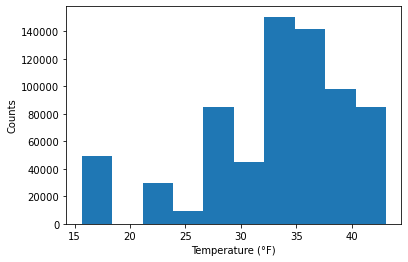

NormaltestResult(statistic=10.791525974654531, pvalue=0.004535758352077577)
The variance using the NumPy module is 41.824926093022235
The standard deviation using the NumPy module is 6.46721934783584
Roughly 68% of the data is between 26.991 and 39.925
Roughly 95% of the data is between 20.523 and 46.392
Roughly 99.7% of the data is between 14.056 and 52.859
The z-scores using the SciPy module are [ 0.99458907  1.08736464  0.29413347 ... -0.31509282 -0.31509282
 -0.31509282]


In [288]:
#Histogram for min temp - did this one for fun, if we like it we can always plug in any variabl
#May want to break this one up into different cells so it prints a little clearer, kept each graph in one cell for clarity while building

# Get temperature data
min_temp = clean_ride_data['temperatureMin']

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(min_temp)
print(f"The mean minimum temperature in Boston for the data set is {mean_numpy}")

median_numpy = np.median(min_temp)
print(f"The median minimum temperature in Boston for the data set is {median_numpy}")

mode_scipy = sts.mode(min_temp)
print(f"The mode minimum temperature in Boston for the data set is {mode_scipy}")

# Characterize the data set using matplotlib and stats.normaltest
plt.hist(min_temp)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.savefig("Resources/Counts for Min Tempature Rides.png")
plt.show()


print(sts.normaltest(min_temp.sample(50)))

# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(min_temp,ddof = 0)
print(f"The variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(min_temp,ddof = 0)
print(f"The standard deviation using the NumPy module is {sd_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(min_temp)
print(f"The z-scores using the SciPy module are {z_scipy}")



The r-squared is: 0.01682866523852337


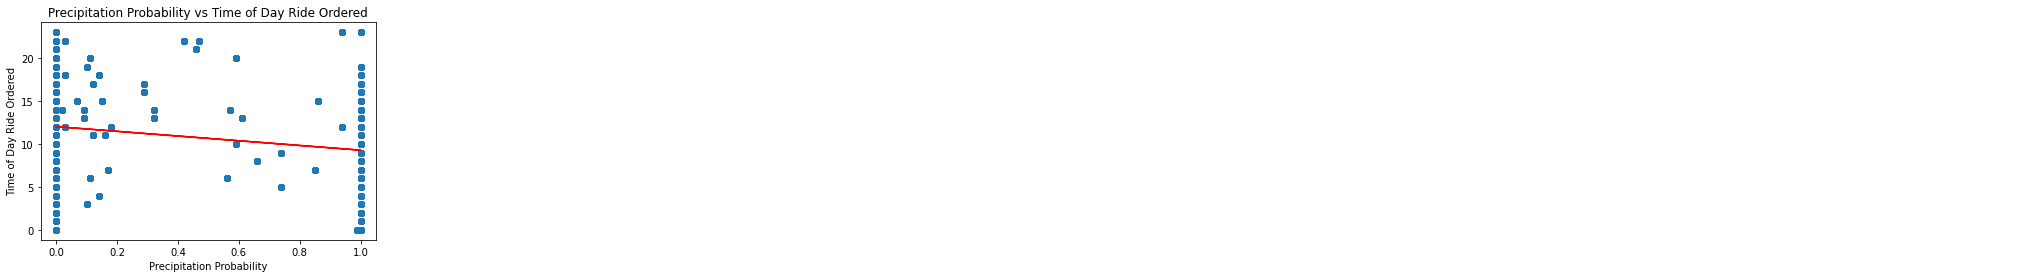

In [279]:

##Added plt.savefig & regression
# Scatter plot for Precip Probab and Time Ordered   - Tova

# Add the linear regression equation and line to plot - first two lines are variables, save if regression doesn't work 
Precip_prob = clean_ride_data['precipProbability']
Time_ordered = clean_ride_data['hour']

x_values = Precip_prob
y_values = Time_ordered

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Precipitation Probability')
plt.ylabel('Time of Day Ride Ordered')
plt.title('Precipitation Probability vs Time of Day Ride Ordered')
plt.savefig("Resources/Precipitation Probability vs Time of Day Ride Ordered 1.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#saving this as a comment incase the aboved doesn't work 
#plt.scatter(Time_ordered, Precip_prob)
#plt.ylabel('Precipitation Probability')
#plt.xlabel('Time of Day Ride Ordered')
#plt.title('Precipitation Probability vs Time of Day Ride Ordered')
#plt.show()
#plt.savefig("Resources/Precipitation Probability vs Time of Day Ride Ordered 1.png")

The r-squared is: 0.039279321785932825


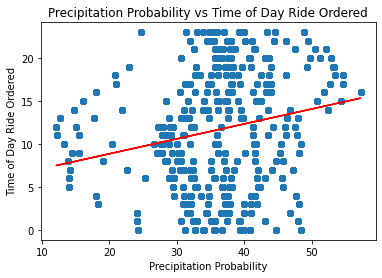

In [280]:

# Scatter plot for Temp and Time Ordered 
Precip_prob = clean_ride_data['apparentTemperature']
Time_ordered = clean_ride_data['hour']

# Add the linear regression equation and line to plot - first two lines are variables, save if regression doesn't work
x_values = Precip_prob
y_values = Time_ordered
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Precipitation Probability')
plt.ylabel('Time of Day Ride Ordered')
plt.title('Precipitation Probability vs Time of Day Ride Ordered')
plt.savefig("Resources/Precipitation Probability vs Time of Day Ride Ordered 2.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#saving below as a comment in case regression doesn't work 
#plt.scatter(Time_ordered, Precip_prob)
#plt.ylabel('Apparent Temperature')
#plt.xlabel('Time of Day Ride Ordered')
#plt.title('Apparent Temperature vs Time of Day Ride Ordered')
#plt.savefig("Resources/Precipitation Probability vs Time of Day Ride Ordered 2.png")
#plt.show()

C:\Users\jillp\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


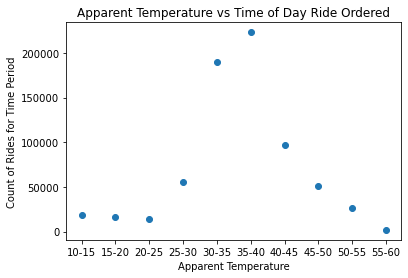

In [261]:
## added plot save
# Bin by Temperature / count 
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
group_names = ["10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60"]

clean_ride_data["Apparent Temp"] = pd.cut(clean_ride_data["apparentTemperature"], bins, labels=group_names, include_lowest=True)

# Creating a group based off of the bins
Temp_group = clean_ride_data.groupby("Apparent Temp")

# Find how many rows fall into each bin
Apparent_count = (Temp_group["Apparent Temp"].count())


BinnedTemp = {
                         "Count": Apparent_count

                      }

BinnedTemp_df= pd.DataFrame(BinnedTemp)
BinnedTemp_df

Temp = BinnedTemp_df.index
Count = BinnedTemp_df['Count']

plt.scatter(Temp, Count)
plt.ylabel('Count of Rides for Time Period')
plt.xlabel('Apparent Temperature')
plt.title('Apparent Temperature vs Time of Day Ride Ordered')
plt.savefig("Resources/Ride Counts by Average Apparent Temperature Scatter.png")
plt.show()

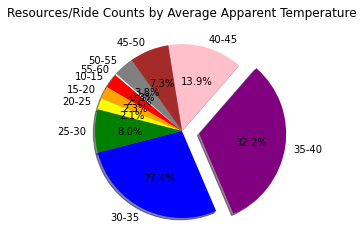

In [281]:
##NEW##
# Binned Temperature and Ride Counts - use Average Apparent Temperature - Tova
# Pie Plot for temp/rides
%matplotlib inline

# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts


# Labels for the sections of our pie chart 
labels = BinnedTemp_df.index

# The values of each section of the pie chart 
sizes = BinnedTemp_df['Count']

# The colors of each section of the pie chart
colors = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "brown", "gray", "white"]

# Tells matplotlib to seperate the "whatever we want to highlight" section from the others
explode = (0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0)

plt.title("Resources/Ride Counts by Average Apparent Temperature")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Resources/Ride Counts by Average Apparent Temperature Pie.png")

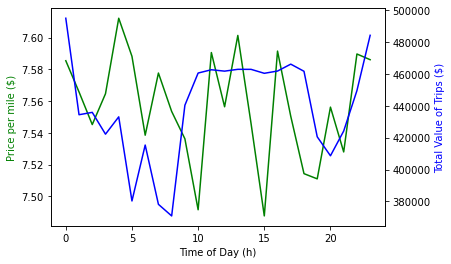

In [263]:
##added plt save
# Data analysis for binned time of day, average - total price for each hour for all of Boston, create line plot to show these data.
# Set Bins
%matplotlib inline
# Creating a group based off of the bins
Grouped_by_hour = clean_ride_data.groupby("hour")

# Find how many rows fall into each bin
Price_hour = (Grouped_by_hour["price"].mean())
Price_total = (Grouped_by_hour["price"].sum())
Hour = (Grouped_by_hour["hour"].mean())
Distance = (Grouped_by_hour["distance"].mean())
#Distance_Total = (Grouped_by_hour["distance"].sum())
Price_per_mile = Price_hour/Distance

Price_data = {
                         "Average Price": Price_hour,
                          "Total Value": Price_total,
                          "Hour":Hour,
                          "Distance": Distance,
                           "Price per mile":Price_per_mile
                      }

Price_data_df= pd.DataFrame(Price_data)
Price_data_df
# Plot this as using two y axis for average price and then total value of that time 

Hour = Price_data_df["Hour"]
Average_Price = Price_data_df["Average Price"]
Total_Value = Price_data_df["Total Value"]
Price_per_mile = Price_data_df["Price per mile"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Hour, Price_per_mile, 'g-')
ax2.plot(Hour, Total_Value, 'b-')

ax1.set_xlabel('Time of Day (h)')
ax1.set_ylabel('Price per mile ($)', color='g')
ax2.set_ylabel('Total Value of Trips ($)', color='b')

plt.savefig("Price per Mile & Total Trip Volume vs Time of Day Line.png")

plt.show()

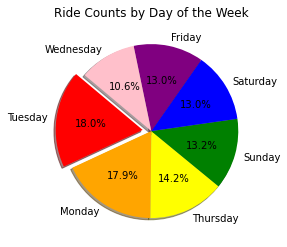

In [264]:
##added save plt and title
# Pie Plot for Day of the week total counts
%matplotlib inline

# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts


# Labels for the sections of our pie chart 
labels = Total_rides_day_df.index

# The values of each section of the pie chart 
sizes = Total_rides_day_df["Total Count"]

# The colors of each section of the pie chart
colors = ["red", "orange", "yellow", "green", "blue", "purple", "pink"]

# Tells matplotlib to seperate the "whatever we want to highlight" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0)

plt.title("Ride Counts by Day of the Week")
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("Resources/Ride Counts by Day of the Week Pie.png")

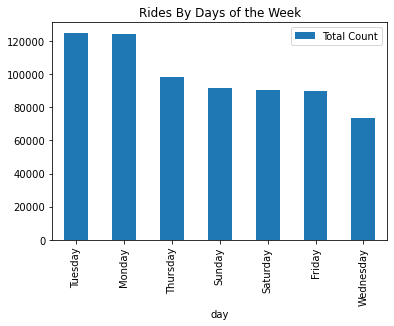

<Figure size 432x288 with 0 Axes>

In [287]:

# Bar plot for Day of the week total counts - may want to clean up total_rides_day_df for cleaner headers so it populates nicer
%matplotlib inline
# Use DataFrame.plot() in order to create a bar chart of the data
#Total_rides_day_df.plot(kind="bar", figsize=(10,8))
Total_rides_day_df.plot(kind="bar")

# Set a title for the chart
plt.title("Rides By Days of the Week")
plt.savefig("Resources/Ride Counts by Day of the Week Bar.png")
plt.show()

plt.tight_layout()


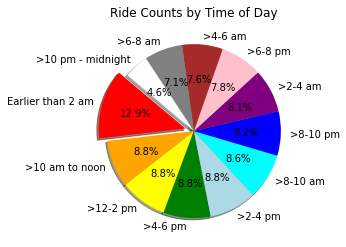

In [266]:
# Pie Plot for time of day total counts

%matplotlib inline

# Labels for the sections of our pie chart 
labels = BinnedHours_Sort_df.index

# The values of each section of the pie chart 
sizes = BinnedHours_Sort_df["Total Count"]

# The colors of each section of the pie chart - may have to revisit color names
colors = ["red", "orange", "yellow", "green","lightblue", "aqua", "blue", "purple", "pink", "brown", "gray", "white"]

# Tells matplotlib to seperate the "whatever we want to highlight" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.title("Ride Counts by Time of Day")
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Resources/Ride Counts by Time of Day Pie.png")

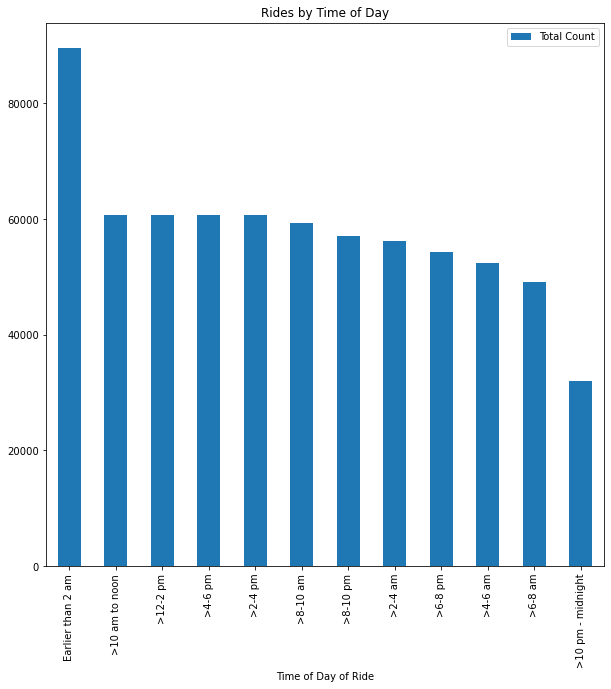

<Figure size 432x288 with 0 Axes>

In [289]:
# Bar plot for time of day total counts
%matplotlib inline
# Extract the columns needed for the graph
BinnedHours_Sort_Bar_df = BinnedHours_Sort_df[["Total Count"]]

# Use DataFrame.plot() in order to create a bar chart of the data
BinnedHours_Sort_Bar_df.plot(kind="bar", figsize=(10,10))

# Set a title for the chart
plt.title("Rides by Time of Day")
plt.savefig("Resources/Ride Counts by Time of Day Bar.png")
plt.show()
plt.tight_layout()


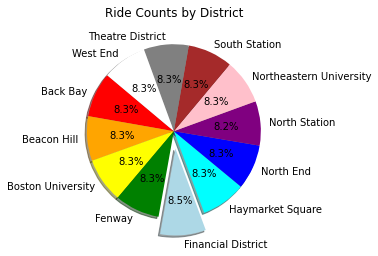

In [269]:
%matplotlib inline

grouped_Stats_2_df = clean_ride_data.groupby(['source'])

Number_rides2 = grouped_Stats_2_df ['source'].count()

Summary_table2 = {
            "Total Source Counts": Number_rides2,
           
}

Summary_table2_df = pd.DataFrame(Summary_table2)

# Labels for the sections of our pie chart 
labels = Summary_table2_df.index

# The values of each section of the pie chart 
sizes = Summary_table2_df["Total Source Counts"]

# The colors of each section of the pie chart - may have to adjust colors to inlcude all locations
colors = ["red", "orange", "yellow", "green", "lightblue", "aqua", "blue", "purple", "pink", "brown", "gray", "white"]

# Tells matplotlib to seperate the "whatever we want to highlight" section from the others
explode = (0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0)

plt.title("Ride Counts by District")
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Resources/Ride Counts by District Pie.png")

# Heatmaps using gmaps

In [270]:
#configure gmaps and Use the Lat and Lng as locations and Humidity as the weight.Add Heatmap layer to map.
gmaps.configure(api_key=g_key)

# Slice data into a smaller subsection
clean_ride_data_subset = clean_ride_data[:800000]

clean_ride_data_subset= clean_ride_data_subset.dropna()
locations = clean_ride_data_subset[["latitude", "longitude"]].astype(float)
price = clean_ride_data_subset["price"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=price)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [271]:
#configure gmaps and Use the Lat and Lng as locations and Humidity as the weight.Add Heatmap layer to map.
gmaps.configure(api_key=g_key)

# Slice data into a smaller subsection
clean_ride_data_subset = clean_ride_data[:800000]

clean_ride_data_subset= clean_ride_data_subset.dropna()

locations = clean_ride_data_subset[["latitude", "longitude"]].astype(float)
Distance = clean_ride_data_subset["distance"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=Distance)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))